# Short-Time Fourier Transform : √©l√©ments d'analyse spectrale

## Introduction √† 4 petits exercices


L'objectif de ces petits exercices est d'explorer les caract√©ristiques des fen√™tres d'analyse fr√©quentielles utilis√©es pour faire la STFT, appliqu√©e √† la musique.  Ces exercices se feront en deux parties principales :
<LI> Une exploration des caract√©risiques des fen√™tres d'analyse : extraction du lobe principal, de son amplitude et du rapport Signal/Bruit apr√®s reconstruction du signal.</LI>

<li> Calcul de l'√©nergie d'un signal dans des bandes de fr√©quence donn√©es, et √©ventuellement d√©tection de rythme</LI>

# Quelques rappels

## Largeur du lobe principal et att√©nuation du lobe secondaire d'une fen√™tre d'analyse

La largeur du lobe principal est un √©l√©ment fondamental de la fen√™tre d'analyse.  En effet, une sinuso√Øde complexe de fr√©quence $\frac{k}{N}$, avec $k$ entier et de longueur $N$, a comme spectre $X[k] = \delta[k]$.  Apr√®s fen√™trage (donc multiplication dans le domaine temporel), par une fen√™tre de longueur $M<N$, l'impulsion $\delta[k]$ sera convolu√©e par la r√©ponse fr√©quentielle $W[k]$, et appara√Ætra donc comme √©tant "√©largie" en fr√©quence. De ce point de vue, on a int√©r√™t √† utiliser une fen√™tre de largeur la plus petite possible.

Par contre, $W[k]$ comprend √©galement des lobes secondaires, qui doivent avoir l'amplitude (relative √† celle du lobe principal) la plus faible possible, et les fen√™tres de lobe principal le plus √©troit ont √©galement un lobe secondaire d'amplitude plus √©lev√©e.  Il faut donc faire un compromis entre largeur de bande du lobe principal et att√©nuation du lobe secondaire.

Vous v√©rifierez que si $M$ est fix√©, la largeur du lobe principal n'est pas modifi√©e.  Par contre, vous verrez sur l'exemple ci-dessous que, si on modifie la quantit√© de z√©ro padding (ici on utilise $N = 8*M$), la largeur du lobe principal est (ici 8 fois) plus grande.

##  FFT
On utilise la FFT comme m√©thode rapide de calcul de la DFT.  La FFT est la plus efficace quand $N$ est une puissance de 2.  Notez, toujours dans l'exemple ci-dessous, l'utilisation de "fftshift" pour centrer le spectre autour de la fr√©quence 0.

## Energie d'un signal

L'√©nergie d'un signal $x[n]$ de longueur $N$ peut-√™tre calcul√©e, dans le domaine temporel par 
$$ E = \displaystyle \sum_{n=0}^{N-1} \left|x[n]\right|^2$$


## Energie dans une bande fr√©quentielle

L'√©nergie dans une bande fr√©quentielle entre les indices $k_1$ et $k_2$ peut √™tre calcul√©e par 

$$E = \displaystyle \frac{1}{N}\sum_{k=k_1}^{k_2} \left|X[k]\right|^2$$

On notera la pr√©sence du facteur $\frac{1}{N}$, qui tient compte de la "non orthonormalit√©" de la DFT.

Attention, l'√©nergie (en dB) se calcule par :

$$ E_{dB} = 10 \log_{10}(E)$$

Alors que l'amplitude en dB se calcule par :

$$ A_{dB} = 20 \log_{10}(A)$$

En effet, une √©nergie est proportionnelle √† une amplitude au carr√©, et les d√©cibels repr√©sentes une mesure d'√©nergie, ou de puissance, ou un rapport entre ces quantit√©s.

## Rapport signal/bruit (SNR : Signal to Noise Ratio)

Soit un signal $v$ d√©finit par $v=x+n$, o√π $x$ est "le signal" et $n$ le bruit.

Le rapport signal/bruit est le rapport entre la puissance (ou l'√©nergie) du signal et la puissance (ou l'√©nergie) du bruit, la plupart du temps exprim√©e en dB.

$$SNR = 10 \log_{10} \left(\frac{E_{signal}}{E_{bruit}}\right)$$



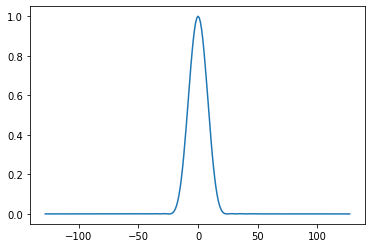

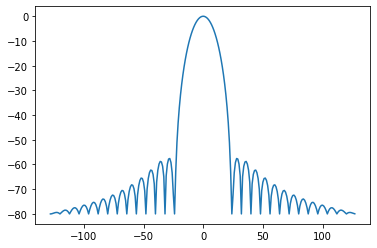

9.7472
9.7472


In [8]:
import numpy as np
from scipy.signal import get_window
from scipy.fftpack import ifft,fft, fftshift
import math
import matplotlib.pyplot as plt
eps = np.finfo(float).eps

M=32;
N=8*M;
w=get_window('blackman',M)
w=np.concatenate([w,np.zeros(N-M)])
f=np.arange(-N/2,N/2,1)
W=fft(w)
Wor=W
W=W/np.max(abs(W))
plt.plot(f,abs(fftshift(W)))
plt.show()
plt.plot(f,20*np.log10(abs(fftshift(W))+1e-4))
plt.show()
print(np.sum(w**2))
print(np.sum(abs(Wor)**2)/N)


## exo 1 : extraire le lobe principal d'une fen√™tre d'analyse

Compl√©ter la fonction $extractMainLobe(window,M)$ qui extrait le lobe principal de l'amplitude du spectre.  Vous utiliserez du z√©ropadding d'ordre 8 ($N=8*M$).  Les entr√©es de la fonction sont le type de fen√™tre ($window$) et la taille de la fen√™tre ($M$).  La sortie de la fonction est un $np.array$ contenant les valeurs (en dB) des √©chantillons de la fen√™tre principale (en fr√©quence).  Notez que $\log(0)$ √©tant ind√©fini, on utilise souvent $\log(x+eps)$, o√π $x$ est positif (car un carr√©) et eps = 1e-16 (voire plus) pour √©viter le probl√®me induit quand $x=0$.


Dans un premier temps, vous pouvez "tricher" en d√©tectant visuellement l'endroit o√π commence et termine la fen√™tre.  Dans un deuxi√®me temps, vous pouvez "d√©tecter" les passages par z√©ro (ou presque !) de la r√©ponse fr√©quentielle, et ainsi d√©tecter les indices de d√©but et de fin de fen√™tre (qui sont les premiers autour de $k=0$ si vous centrer, ou $k=N/2$ si vous ne centrez pas la fen√™tre fr√©quentielle).

<li>Test case 1: Si vous utilisez  $window = 'blackmanharris'$ et $M = 100$, la sortie devrait √™tre un np.array de 65 √©chantillons.</li>
<li>Test case 2: Si vous utilisez  $window = 'boxcar'$ (fen√™tre rectangulaire) et $M = 120$, la sortie devrait √™tre un np.array de 17 √©chantillons.</li>
<li>Test case 3: Si vous utilisez  $window = 'hamming'$ et $M = 256$, la sortie devrait √™tre un np.array de 33 √©chantillons.</li>


In [9]:
from array import array
f=np.arange(0,M)

def compute_mainlobe_width(spectrum):
    """
    computes mainlobe width from spectrum
    
    assumes the mainlobe starts at 0, that spectrum size is odd, and that 
    the spectrum is real-valued (half of the frequencies)
    
    returns the number of samples of full mainlobe (not just half)
    """
    abs_spectrum = np.abs(spectrum)
    current_value = abs_spectrum[0]
    for ind, next_value in enumerate(abs_spectrum): 
        if next_value > current_value:                
            break
        else:
            current_value = next_value        
    return 2 * ind - 1

def extractMainLobe(window, M):
    
#    Input:
#            window (string): Window type to be used (Either rectangular ('boxcar'), 'hamming' or '
#                blackmanharris')
#            M (integer): length of the window to be used
#    Output:
#            The function should return a numpy array containing the main lobe of the magnitude 
#            spectrum of the window in decibels (dB).

    ### Your code here
    
    N=8*M;
    w=get_window(window,M)
    w_fft = np.fft.rfft(w, N)
    freqs = np.fft.rfftfreq(n, d=1/m)
    
    nbr=compute_mainlobe_width(w_fft)
    print(nbr)
    
    s = np.abs(w_fft)[:nbr]
    return s

In [41]:

a = extractMainLobe('blackmanharris', 100)
b = extractMainLobe('boxcar', 120)
c = extractMainLobe('hamming', 256)
print('Blackman-Harris with M=100 array =')
print(a)
print(' ')
print('Rectangle with M=120 array =')
print(b)
print(' ')
print('Hamming with M=256 array =')
print(c)

65
17
33
Blackman-Harris with M=100 array =
[3.58750000e+01 3.56633054e+01 3.50350716e+01 3.40105107e+01
 3.26222036e+01 3.09135146e+01 2.89365127e+01 2.67495295e+01
 2.44145000e+01 2.19942459e+01 1.95498549e+01 1.71382996e+01
 1.48104162e+01 1.26093349e+01 1.05694173e+01 8.71572469e+00
 7.06400000e+00 5.62111989e+00 4.38594333e+00 3.35046617e+00
 2.50117937e+00 1.82052636e+00 1.28836003e+00 8.83311483e-01
 5.84000000e-01 3.70033320e-01 2.22769231e-01 1.25830107e-01
 6.53808464e-02 3.01959740e-02 1.15526686e-02 2.99293058e-03
 1.06234487e-15 3.68245157e-04 1.58366750e-04 6.82808284e-04
 8.97082803e-04 7.94604479e-04 5.11879837e-04 2.08216904e-04
 8.38683943e-16 6.52580934e-05 4.35906373e-05 1.66036404e-04
 3.10618667e-04 3.92449144e-04 3.68623296e-04 2.30125434e-04
 2.48491994e-16 2.74947823e-04 5.36642532e-04 7.29312129e-04
 8.11297016e-04 7.62998557e-04 5.89873296e-04 3.20418830e-04
 7.01952365e-16 3.17997003e-04 5.81886667e-04 7.50515050e-04
 7.99751500e-04 7.25717546e-04 5.44452001

## exo 2 : Mesure du rapport signal/bruit

Calculer le bruit introduit lors de l'analyse et de la synth√®se du signal en utilisant la STFT.  Dans un premier temps (pour le premier TD), vous utiliserez une seule trame.  Dans un deuxi√®me temps (pour le deuxi√®me TD), vous utiliserez tout le signal fourni.

Vous calculerez le SNR (selon la d√©finition ci-dessus) en dB pour caract√©riser la quantit√© de bruit.  

Vous calculerez :
<li> Dans un premier temps, 
  <ul>
  <li> SNR1a : le calcul sur la totalit√© de la premi√®re trame </li>
  <li> SNR2a : le calcul sur la premi√®re trame dont vous aurez retranch√© les $M$ premiers √©chantillons et les $M$ derniers √©chantillons </li>
  </ul>
  </li>
  <li> Dans un deuxi√®me temps,
  <ul>
  <li> SNR1b : le calcul sur la totalit√© du signal </li>
  <li> SNR2b : le calcul sur la totalit√© dont vous aurez retranch√© les $N$ premiers √©chantillons et les $N$ derniers √©chantillons </li>
  </ul>
  </li>
  
  Vous testerez sur les cas suivants :
  <ol>
  <li> En utilisant le son $sax-phrase-short.wav$ avec la fen√™tre de Hamming, une fen√™tre de longueur $M=512$ et $N=1024$ et $H=64$ (pour le "deuxi√®me temps" de l'exercice, o√π les SNR devraient √™tre de l'ordre de 89 et 306)</li>
 <li> En utilisant le son $piano.wav$ avec la fen√™tre de Blackman, une fen√™tre de longueur $M=513$ et $N=2048$ et $H=128$ (pour le "deuxi√®me temps" de l'exercice, o√π les SNR devraient √™tre de l'ordre de 67 et 304 (? ou 86)))
 </li>
 <li> En utilisant le son $rain.wav$ avec la fen√™tre de Hanning, une fen√™tre de longueur $M=1024$ et $N=2048$ et $H=128$ (pour le "deuxi√®me temps" de l'exercice, o√π les SNR devraient √™tre de l'ordre de 74 et 304)
 </li>
  
  </ol></li>

In [3]:
from scipy.io.wavfile import read
# example : (rate,ypiano)=read('piano.wav')


In [10]:
tol=1e-14
def isPower2(num):
	
	return ((num & (num - 1)) == 0) and num > 0

def dftModel(x, w, N):

	#Analysis/synthesis of a signal using the discrete Fourier transform
	#x: input signal, w: analysis window, N: FFT size
	#returns y: output signal

	if not(isPower2(N)):                                 # raise error if N not a power of twou
		raise ValueError("FFT size (N) is not a power of 2")

	if (w.size > N):                                        # raise error if window size bigger than fft size
		raise ValueError("Window size (M) is bigger than FFT size")

	if all(x==0):                                           # if input array is zeros return empty output
		return np.zeros(x.size)
	hN = (N//2)+1                                           # size of positive spectrum, it includes sample 0
	hM1 = (w.size+1)//2                                     # half analysis window size by rounding
	hM2 = int(math.floor(w.size/2))                         # half analysis window size by floor
	fftbuffer = np.zeros(N)                                 # initialize buffer for FFT
	y = np.zeros(x.size)                                    # initialize output array
	#----analysis--------
	xw = x*w                                                # window the input sound
	fftbuffer[:hM1] = xw[hM2:]                              # zero-phase window in fftbuffer
	fftbuffer[-hM2:] = xw[:hM2]        
	X = fft(fftbuffer)                                      # compute FFT
	absX = abs(X[:hN])                                      # compute ansolute value of positive side
	absX[absX<np.finfo(float).eps] = np.finfo(float).eps    # if zeros add epsilon to handle log
	mX = 20 * np.log10(absX)                                # magnitude spectrum of positive frequencies in dB     
	pX = np.unwrap(np.angle(X[:hN]))                        # unwrapped phase spectrum of positive frequencies
	#-----synthesis-----
	Y = np.zeros(N, dtype = complex)                        # clean output spectrum
	Y[:hN] = 10**(mX/20) * np.exp(1j*pX)                    # generate positive frequencies
	Y[hN:] = 10**(mX[-2:0:-1]/20) * np.exp(-1j*pX[-2:0:-1]) # generate negative frequencies
	fftbuffer = np.real(ifft(Y))                            # compute inverse FFT
	y[:hM2] = fftbuffer[-hM2:]                              # undo zero-phase window
	y[hM2:] = fftbuffer[:hM1]
	return y

def dftAnal(x, w, N):
	"""
	Analysis of a signal using the discrete Fourier transform
	x: input signal, w: analysis window, N: FFT size 
	returns mX, pX: magnitude and phase spectrum
	"""

	if not(isPower2(N)):                                 # raise error if N not a power of two
		raise ValueError("FFT size (N) is not a power of 2")

	if (w.size > N):                                        # raise error if window size bigger than fft size
		raise ValueError("Window size (M) is bigger than FFT size")

	hN = (N//2)+1                                           # size of positive spectrum, it includes sample 0
	hM1 = (w.size+1)//2                                     # half analysis window size by rounding
	hM2 = w.size//2                                         # half analysis window size by floor
	fftbuffer = np.zeros(N)                                 # initialize buffer for FFT
	w = w / sum(w)                                          # normalize analysis window
	xw = x*w                                                # window the input sound
	fftbuffer[:hM1] = xw[hM2:]                              # zero-phase window in fftbuffer
	fftbuffer[-hM2:] = xw[:hM2]        
	X = fft(fftbuffer)                                      # compute FFT
	absX = abs(X[:hN])                                      # compute ansolute value of positive side
	absX[absX<np.finfo(float).eps] = np.finfo(float).eps    # if zeros add epsilon to handle log
	mX = 20 * np.log10(absX)                                # magnitude spectrum of positive frequencies in dB
	X[:hN].real[np.abs(X[:hN].real) < tol] = 0.0            # for phase calculation set to 0 the small values
	X[:hN].imag[np.abs(X[:hN].imag) < tol] = 0.0            # for phase calculation set to 0 the small values         
	pX = np.unwrap(np.angle(X[:hN]))                        # unwrapped phase spectrum of positive frequencies
	return mX, pX

def dftSynth(mX, pX, M):
	"""
	Synthesis of a signal using the discrete Fourier transform
	mX: magnitude spectrum, pX: phase spectrum, M: window size
	returns y: output signal
	"""

	hN = mX.size                                            # size of positive spectrum, it includes sample 0
	N = (hN-1)*2                                            # FFT size
	if not(isPower2(N)):                                 # raise error if N not a power of two, thus mX is wrong
		raise ValueError("size of mX is not (N/2)+1")

	hM1 = int(math.floor((M+1)/2))                          # half analysis window size by rounding
	hM2 = int(math.floor(M/2))                              # half analysis window size by floor
	fftbuffer = np.zeros(N)                                 # initialize buffer for FFT
	y = np.zeros(M)                                         # initialize output array
	Y = np.zeros(N, dtype = complex)                        # clean output spectrum
	Y[:hN] = 10**(mX/20) * np.exp(1j*pX)                    # generate positive frequencies
	Y[hN:] = 10**(mX[-2:0:-1]/20) * np.exp(-1j*pX[-2:0:-1]) # generate negative frequencies
	fftbuffer = np.real(ifft(Y))                            # compute inverse FFT
	y[:hM2] = fftbuffer[-hM2:]                              # undo zero-phase window
	y[hM2:] = fftbuffer[:hM1]
	return y

def stft(x, w, N, H):
	#Analysis/synthesis of a sound using the short-time Fourier transform
	#x: input sound, w: analysis window, N: FFT size, H: hop size
	#returns y: output sound
	
	
	if (H <= 0):                                   # raise error if hop size 0 or negative
		raise ValueError("Hop size (H) smaller or equal to 0")
		
	M = w.size                                     # size of analysis window
	hM1 = (M+1)//2                                 # half analysis window size by rounding
	hM2 = M//2                                     # half analysis window size by floor
	x = np.append(np.zeros(hM2),x)                 # add zeros at beginning to center first window at sample 0
	x = np.append(x,np.zeros(hM1))                 # add zeros at the end to analyze last sample
	pin = hM1                                      # initialize sound pointer in middle of analysis window       
	pend = x.size-hM1                              # last sample to start a frame
	w = w / sum(w)                                 # normalize analysis window
	y = np.zeros(x.size)                           # initialize output array
	while pin<=pend:                               # while sound pointer is smaller than last sample      
	#-----analysis-----  
		x1 = x[pin-hM1:pin+hM2]                    # select one frame of input sound
		mX, pX = dftAnal(x1, w, N)                 # compute dft
	#-----synthesis-----
		y1 = dftSynth(mX, pX, M)               # compute idft
		y[pin-hM1:pin+hM2] += H*y1                 # overlap-add to generate output sound
		pin += H                                   # advance sound pointer
	y = np.delete(y, range(hM2))                   # delete half of first window which was added in stftAnal
	y = np.delete(y, range(y.size-hM1, y.size))    # delete half of the last window which as added in stftAnal
	return y

def stftAnal(x, w, N, H) :
	"""
	Analysis of a sound using the short-time Fourier transform
	x: input array sound, w: analysis window, N: FFT size, H: hop size
	returns xmX, xpX: magnitude and phase spectra
	"""
	if (H <= 0):                                   # raise error if hop size 0 or negative
		raise ValueError("Hop size (H) smaller or equal to 0")
		
	M = w.size                                      # size of analysis window
	hM1 = (M+1)//2                                  # half analysis window size by rounding
	hM2 = M//2                                      # half analysis window size by floor
	x = np.append(np.zeros(hM2),x)                  # add zeros at beginning to center first window at sample 0
	x = np.append(x,np.zeros(hM2))                  # add zeros at the end to analyze last sample
	pin = hM1                                       # initialize sound pointer in middle of analysis window       
	pend = x.size-hM1                               # last sample to start a frame
	w = w / sum(w)                                  # normalize analysis window
	xmX = []                                       # Initialise empty list for mX
	xpX = []                                       # Initialise empty list for pX
	while pin<=pend:                                # while sound pointer is smaller than last sample      
		x1 = x[pin-hM1:pin+hM2]                     # select one frame of input sound
		mX, pX = dftAnal(x1, w, N)              # compute dft
		xmX.append(np.array(mX))                    # Append output to list
		xpX.append(np.array(pX))
		pin += H                                    # advance sound pointer
	xmX = np.array(xmX)                             # Convert to numpy array
	xpX = np.array(xpX)
	return xmX, xpX

def stftSynth(mY, pY, M, H) :
	"""
	Synthesis of a sound using the short-time Fourier transform
	mY: magnitude spectra, pY: phase spectra, M: window size, H: hop-size
	returns y: output sound
	"""
	hM1 = (M+1)//2                                   # half analysis window size by rounding
	hM2 = M//2                                       # half analysis window size by floor
	nFrames = mY[:,0].size                           # number of frames
	y = np.zeros(nFrames*H + hM1 + hM2)              # initialize output array
	pin = hM1                  
	for i in range(nFrames):                         # iterate over all frames      
		y1 = dftSynth(mY[i,:], pY[i,:], M)       # compute idft
		y[pin-hM1:pin+hM2] += H*y1                   # overlap-add to generate output sound
		pin += H                                     # advance sound pointer
	y = np.delete(y, range(hM2))                     # delete half of first window which was added in stftAnal
	y = np.delete(y, range(y.size-hM1, y.size))      # delete the end of the sound that was added in stftAnal
	return y

import IPython
#IPython.display.Audio(audio_np, rate=Fs)


def computeSNR_one_frame(inputFile, window, M, N, H):
#    Input:
#            inputFile (string): wav file name including the path 
#            window (string): analysis window type (choice of rectangular, triangular, hanning, hamming, 
#                    blackman, blackmanharris)
#            M (integer): analysis window length (odd positive integer)
#            N (integer): fft size (power of two, > M)
#            H (integer): hop size for the stft computation
#    Output:
#            The function should return a python tuple of both the SNR values (SNR1, SNR2)
#            SNR1 and SNR2 are floats.
#    """
    # your code here
    y=read(inputFile)
    
    return 0
def computeSNR(inputFile, window, M, N, H):
#    Input:
#            inputFile (string): wav file name including the path 
#            window (string): analysis window type (choice of rectangular, triangular, hanning, hamming, 
#                    blackman, blackmanharris)
#            M (integer): analysis window length (odd positive integer)
#            N (integer): fft size (power of two, > M)
#            H (integer): hop size for the stft computation
#    Output:
#            The function should return a python tuple of both the SNR values (SNR1, SNR2)
#            SNR1 and SNR2 are floats.
#    """
    # your code here
    #(rate,y)=read(inputFile)
    
    def energy(mag):
        e = np.sum((10 ** (mag / 20)) ** 2)
        return e
    
    (fs, x) = read(inputFile)
    w = get_window(window, M)
    
    mX, pX = stftAnal(x, w, N, H)
    y = stftSynth(mX, pX, M, H)
    n = x - y[:x.size]
    n2 = x[w.size:-w.size] - y[:x.size][w.size:-w.size]
    
    mN, pN = stftAnal(n, w, N, H)
    mN2, pN2 = stftAnal(n2, w, N, H)
    
    SNR1 = 10 * np.log10(energy(mX) / energy(mN))
    SNR2 = 10 * np.log10(energy(mX) / energy(mN2))
    
    return SNR1,SNR2


(SNR1,SNR2)=computeSNR('/Users/isabelledias/Downloads/sms-tools-master/sounds/sax-phrase-short.wav','hamming',512,1024,64)

print(SNR1,SNR2)

(SNR1,SNR2)=computeSNR('/Users/isabelledias/Downloads/sms-tools-master/sounds/piano.wav','blackman',513,2048,128)

print(SNR1,SNR2)


(SNR1,SNR2)=computeSNR('/Users/isabelledias/Downloads/sms-tools-master/sounds/rain.wav','hann',1024,2048,128)

print(SNR1,SNR2)


91.668485198745 305.854762880634
72.35338615548093 86.30456282959298
75.0940804091743 305.2935490636909


## Calcul de l'√©nergie dans une bande de fr√©quences donn√©e


Compl√©tez la fonction $computeEngEnv(inputFile, window, M, N, H)$.  Cette fonction doit calculer l'√©nergie (en dB) contenue dans une certaine bande de fr√©quences en utilisant la STFT.

On consid√®re par exemple que les basses fr√©quences sont les fr√©quences de 0 √† 3.000 Hz et les hautes fr√©quences de 3.000 √† 10.000 Hz.

La fonction $stftAnal()$ vous permettra d'obtenir les amplitudes des spectres de toutes les trames du signal audio.  Pour la partie basses fr√©quences, on ne tiendra pas compte de la fr√©quence 0, de mani√®re √† ne pas tenir compte de la composante DC.

Une premi√®re analyse peut consister √† afficher le spectrogramme, avec la fonction ci-dessous.

On prendra trois cas diff√©rents :

<ol>
<li>'piano.wav', avec une fen√™tre de Blackman, $M=513$, N=1024 et $H=128$
</li>
<li>'piano.wav', avec une fen√™tre de Blackman, $M=2047$, N=4096 et $H=128$
</li>
<li>'sax-phrase-short.wav' avec une fen√™tre de Hamming, $M=513$, N=2048 et $H=256$
</li>
</ol>


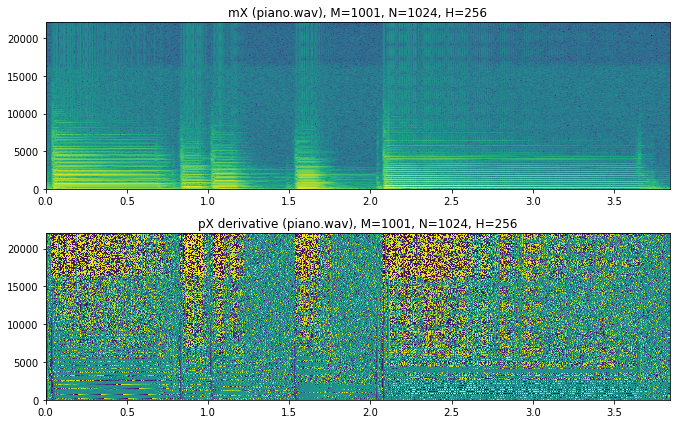

In [11]:


def stftAnal(x, w, N, H):
    """
    Analysis of a sound using the short-time Fourier transform
    x: input array sound, w: analysis window, N: FFT size, H: hop size
    returns xmX, xpX: magnitude and phase spectra
    """
    if (H <= 0):                                   # raise error if hop size 0 or negative
        raise ValueError("Hop size (H) smaller or equal to 0")
        
    M = w.size                                      # size of analysis window
    hM1 = (M+1)//2                                  # half analysis window size by rounding
    hM2 = M//2                                      # half analysis window size by floor
    x = np.append(np.zeros(hM2),x)                  # add zeros at beginning to center first window at sample 0
    x = np.append(x,np.zeros(hM2))                  # add zeros at the end to analyze last sample
    pin = hM1                                       # initialize sound pointer in middle of analysis window       
    pend = x.size-hM1                               # last sample to start a frame
    w = w / sum(w)                                  # normalize analysis window
    while pin<=pend:                                # while sound pointer is smaller than last sample      
        x1 = x[pin-hM1:pin+hM2]                     # select one frame of input sound
        mX, pX = dftAnal(x1, w, N)              # compute dft
        if pin == hM1:                              # if first frame create output arrays
            xmX = np.array([mX])
            xpX = np.array([pX])
        else:                                       # append output to existing array 
            xmX = np.vstack((xmX,np.array([mX])))
            xpX = np.vstack((xpX,np.array([pX])))
        pin += H                                    # advance sound pointer
    return xmX, xpX

(fs, x) = read('/Users/isabelledias/Downloads/sms-tools-master/sounds/piano.wav')
w = np.hamming(1001)
N = 1024
H = 256
mX, pX = stftAnal(x, w, N, H)

plt.figure(1, figsize=(9.5, 6))

plt.subplot(211)
numFrames = int(mX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)                             
binFreq = np.arange(N/2+1)*float(fs)/N                         
plt.pcolormesh(frmTime, binFreq, np.transpose(mX))
plt.title('mX (piano.wav), M=1001, N=1024, H=256')
plt.autoscale(tight=True)

plt.subplot(212)
numFrames = int(pX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)                             
binFreq = np.arange(N/2+1)*float(fs)/N                         
plt.pcolormesh(frmTime, binFreq, np.diff(np.transpose(pX),axis=0))
plt.title('pX derivative (piano.wav), M=1001, N=1024, H=256')
plt.autoscale(tight=True)

plt.tight_layout()
plt.savefig('spectrogram.png')
plt.show()

piano.wav, avec une fen√™tre de Blackman,  ùëÄ=513, N=1024 et ùêª=128


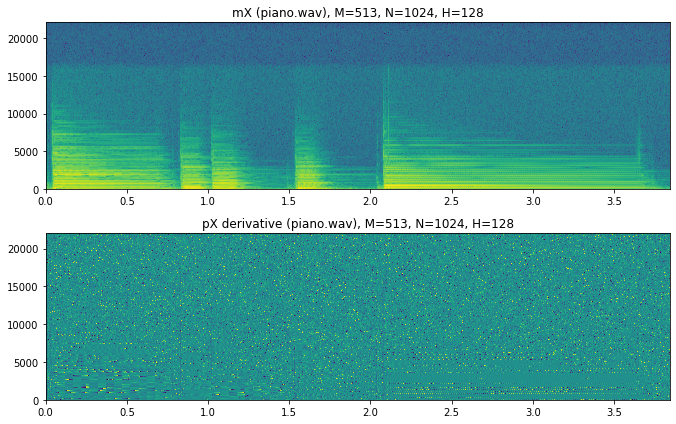

piano.wav, avec une fen√™tre de Blackman,  ùëÄ=2047, N=4096 et ùêª=128


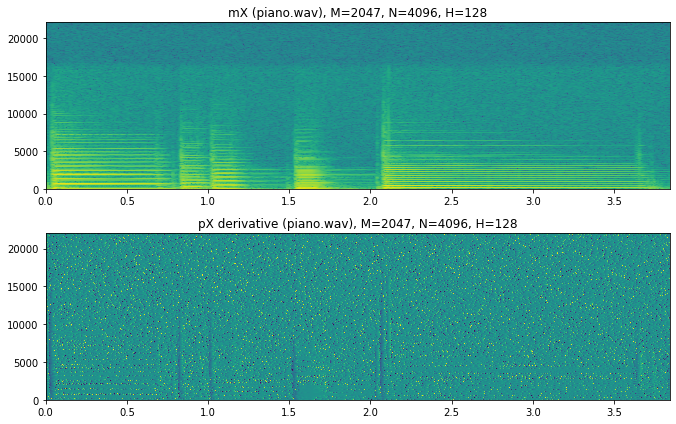

sax-phrase-short.wav, avec une fen√™tre de Hamming,  ùëÄ=513, N=2048 et ùêª=256


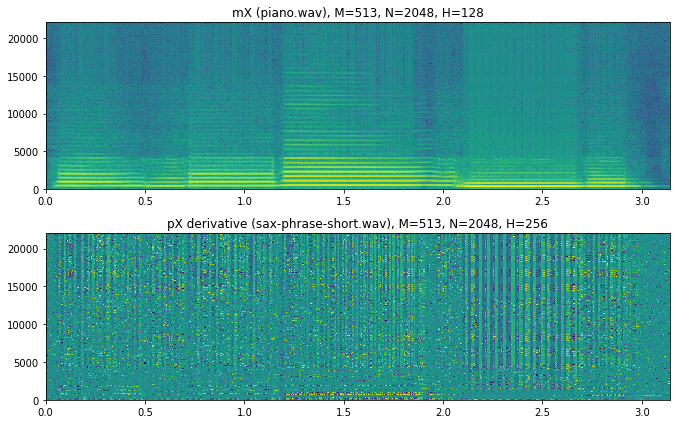

In [12]:
#cas 1 
w = np.blackman(513)
N = 1024
H = 128
mX, pX = stftAnal(x, w, N, H)
print('piano.wav, avec une fen√™tre de Blackman,  ùëÄ=513, N=1024 et ùêª=128')
plt.figure(1, figsize=(9.5, 6))

plt.subplot(211)
numFrames = int(mX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)                             
binFreq = np.arange(N/2+1)*float(fs)/N                         
plt.pcolormesh(frmTime, binFreq, np.transpose(mX))
plt.title('mX (piano.wav), M=513, N=1024, H=128')
plt.autoscale(tight=True)

plt.subplot(212)
numFrames = int(pX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)                             
binFreq = np.arange(N/2+1)*float(fs)/N                         
plt.pcolormesh(frmTime, binFreq, np.diff(np.transpose(pX),axis=0))
plt.title('pX derivative (piano.wav), M=513, N=1024, H=128')
plt.autoscale(tight=True)

plt.tight_layout()
plt.savefig('spectrogram.png')
plt.show()

#cas 2 
w = np.blackman(2047)
N = 4096
H = 128
mX, pX = stftAnal(x, w, N, H)
print('piano.wav, avec une fen√™tre de Blackman,  ùëÄ=2047, N=4096 et ùêª=128')
plt.figure(2, figsize=(9.5, 6))

plt.subplot(211)
numFrames = int(mX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)                             
binFreq = np.arange(N/2+1)*float(fs)/N                         
plt.pcolormesh(frmTime, binFreq, np.transpose(mX))
plt.title('mX (piano.wav), M=2047, N=4096, H=128')
plt.autoscale(tight=True)

plt.subplot(212)
numFrames = int(pX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)                             
binFreq = np.arange(N/2+1)*float(fs)/N                         
plt.pcolormesh(frmTime, binFreq, np.diff(np.transpose(pX),axis=0))
plt.title('pX derivative (piano.wav), M=2047, N=4096, H=128')
plt.autoscale(tight=True)

plt.tight_layout()
plt.savefig('spectrogram.png')
plt.show()


#cas 3 
(fs, x) = read('/Users/isabelledias/Downloads/sms-tools-master/sounds/sax-phrase-short.wav')
w = np.hamming(513)
N = 2048
H = 256
mX, pX = stftAnal(x, w, N, H)
print('sax-phrase-short.wav, avec une fen√™tre de Hamming,  ùëÄ=513, N=2048 et ùêª=256')
plt.figure(2, figsize=(9.5, 6))

plt.subplot(211)
numFrames = int(mX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)                             
binFreq = np.arange(N/2+1)*float(fs)/N                         
plt.pcolormesh(frmTime, binFreq, np.transpose(mX))
plt.title('mX (piano.wav), M=513, N=2048, H=128')
plt.autoscale(tight=True)

plt.subplot(212)
numFrames = int(pX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)                             
binFreq = np.arange(N/2+1)*float(fs)/N                         
plt.pcolormesh(frmTime, binFreq, np.diff(np.transpose(pX),axis=0))
plt.title('pX derivative (sax-phrase-short.wav), M=513, N=2048, H=256')
plt.autoscale(tight=True)

plt.tight_layout()
plt.savefig('spectrogram.png')
plt.show()

In [13]:


def computeEngEnv(inputFile, window, M, N, H):
    """
    Inputs:
            inputFile (string): input sound file (monophonic with sampling rate of 44100)
            window (string): analysis window type (choice of rectangular, triangular, hanning, 
                hamming, blackman, blackmanharris)
            M (integer): analysis window size (odd positive integer)
            N (integer): FFT size (power of 2, such that N > M)
            H (integer): hop size for the stft computation
    Output:
            The function should return a numpy array engEnv with shape Kx2, K = Number of frames
            containing energy envelop of the signal in decibles (dB) scale
            engEnv[:,0]: Energy envelope in band 0 < f < 3000 Hz (in dB)
            engEnv[:,1]: Energy envelope in band 3000 < f < 10000 Hz (in dB)
    """
    
    ### your code here 
    
    (fs, x) = read(inputFile)
    border_bin = int(np.ceil(float(3000) * N / fs))
    max_bin = int(np.ceil(float(10000) * N / fs))
    w = get_window(window, M)
    
    mX, pX = stftAnal(x, w, N, H)
    low = np.transpose(np.transpose(mX)[1:border_bin]) #point minumum
    high = np.transpose(np.transpose(mX)[border_bin:max_bin]) #point maximum
    
    e_low = 10 * np.log10(np.sum((10 ** (low / 20)) ** 2, axis=1)) #energie plus bas
    e_high = 10 * np.log10(np.sum((10 ** (high / 20)) ** 2, axis=1)) #energie plus haut
    
    envs = np.append([e_low], [e_high], axis=0) #envelope
    envs = np.transpose(envs)
    
    # graph en Db 
    plt.figure(1, figsize=(9.5, 6))

    plt.subplot(211)
    numFrames = mX.shape[0]
    frmTime = H*np.arange(numFrames)/float(fs)
    binFreq = np.arange(mX.shape[1])*float(fs)/N
    plt.pcolormesh(frmTime, binFreq, np.transpose(mX))
    plt.title('mX ({0}), M={1}, N={2}, H={3}'.format(inputFile, M, N, H))
    plt.autoscale(tight=True)
    
    plt.subplot(212)
    plt.plot(frmTime, e_low, color="blue", label="row")
    plt.plot(frmTime, e_high, color="red", label="high")
    plt.title('Energie en dB')
    plt.autoscale(tight=True)

    plt.tight_layout()
    plt.show()
    
    return envs

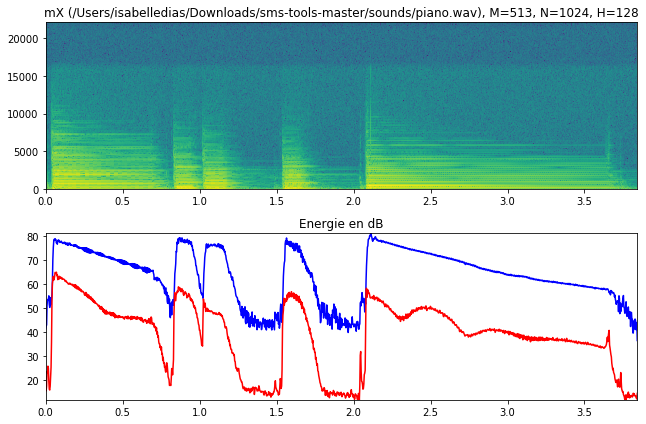

[[41.28743528 21.16269227]
 [42.51453198 15.46077765]
 [42.86338728 17.41006344]
 ...
 [43.92302679 12.45928054]
 [43.35564847 12.09677304]
 [36.43627022 14.423316  ]]


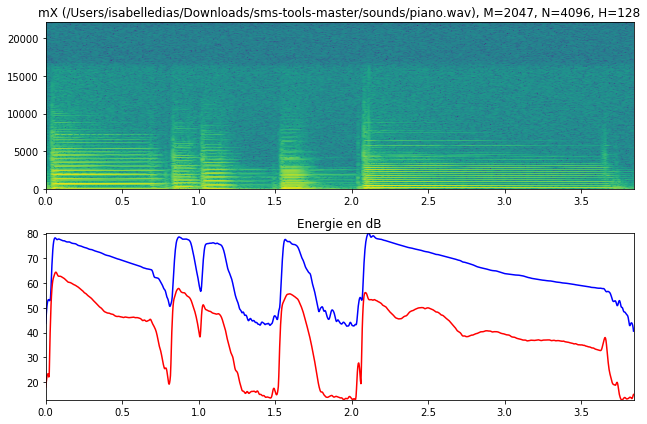

[[43.69611024 17.96574693]
 [46.6576018  19.59942393]
 [49.0760257  21.07511406]
 ...
 [42.97219777 13.85315356]
 [42.01770226 14.51633871]
 [40.55829553 14.97221901]]


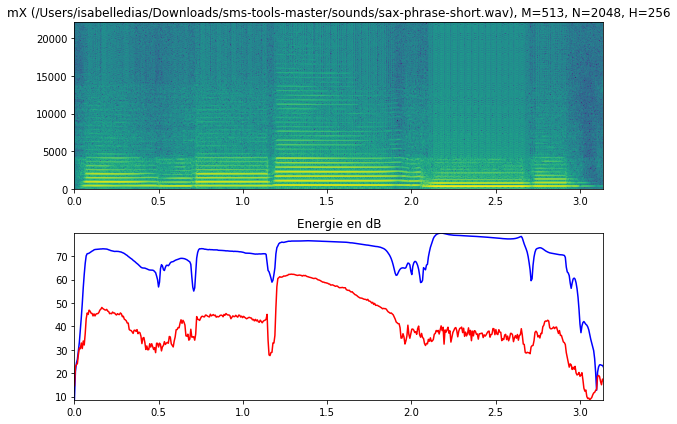

[[ 8.81771244 14.65167177]
 [20.55786735 22.78677551]
 [24.27116955 23.58110962]
 ...
 [23.33995519 15.02286282]
 [23.29771285 17.44095505]
 [22.55931091 16.69149017]]


In [14]:
x=computeEngEnv('/Users/isabelledias/Downloads/sms-tools-master/sounds/piano.wav', 'blackman', 513, 1024, 128)
print(x)
x=computeEngEnv('/Users/isabelledias/Downloads/sms-tools-master/sounds/piano.wav', 'blackman', 2047, 4096, 128)
print(x)
x=computeEngEnv('/Users/isabelledias/Downloads/sms-tools-master/sounds/sax-phrase-short.wav', 'hamming', 513, 2048, 256)
print(x)

## Analyse de notes

L'ojbectif du petit exercices suivant est, √† partir d'un fichier 'wav', de d√©tecter le tempo d'une musique, la dur√©e des notes aff√©rentes (une noire √† 180 bpm veut dire qu'il y a 180 noires par minutes, et donc qu'une noire dure 333 ms) et de d√©terminer la note.

Vous trouverez par exemple les fr√©quences des notes, avec la notation anglaise, sur : https://www.intmath.com/trigonometric-graphs/music.php

4 fichiers "tune1.wav" jusque "tune4.wav" vous sont fournis, et on vous demande de d√©terminer le tempo, les notes et la dur√©e des notes (la dur√©e des notes √©tant √©gale √† la $(\mbox{dur√©e d'une noire})^{2n}$, o√π $n$ peut √™tre n√©gatif ou positif, et $n$ vaut entre -3 et 3).  Vous ferez ce travail en utilisant la stft, voire la dft sur des morceaux.

Vous donnerez les param√®tres que vous utilisez pour la stft, ainsi que le r√©sultat (en quelque sorte la partition).  Notez qu'a certain moments, vous pouvez avoir plusieurs notes en m√™me temps !


